## Project: 以OPENCV擷取一張圖的所有文字內容
應用：此演算法常用於字體、車牌辨識。

### STEP1: 引入所需要之模組
<li>OpenCV:電腦視覺庫，有許多管廣泛被使用的圖像處理算法</li>
<li>matplotlib:用於資料視覺化的庫</li>
<li>numpy:python的擴充函示庫，有許多矩陣運算之重要函式</li>

In [2]:
import matplotlib.image as mpImg
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

### STEP2: 圖像處理
我們的目的是將圖片上的所有數字依序擷取下來
首先讀入一張含有數字的圖片，接著以cv2中的演算法逐一取得構成圖片中文字的邊框頂點。
由於本演算法擷取目標的方式僅對白色作用，因此必須將圖像作顏色的顛倒轉換，因為原始圖片的字體皆為黑色。

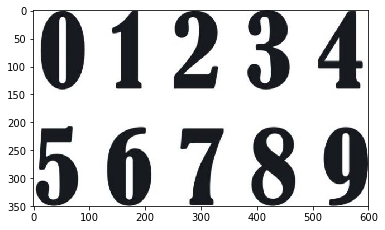

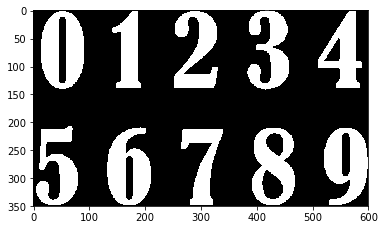

In [3]:
#讀取圖片 並顯示
image = cv2.imread('numbers.jpg')
plt.imshow(image)
plt.show()

#作圖片之色彩顛倒轉換 並顯示
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
threshold = np.zeros_like(gray)
threshold[gray < 100] = 255

plt.imshow(threshold, cmap='gray')
plt.show()

### STEP3: 取得圖片中所有文字的位置資訊
cv2.findContours()，是一個用於將圖片中所有個體獨立的算法，返回之 cnts變數是是一個陣列，存放了所有圖片中個體的邊框頂點位置。
本圖中含有10個數字，而cnts中包含了所有構成此10個數字的邊框頂點。

In [4]:
_, cnts, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

### STEP4: 取得每個文字的位置及大小
文字的邊框頂點數量可能極其巨大，以數字0來說，構成其外型所需要的頂點數量為數百計。
因此我們可以簡化這些頂點成為一個包含整個字體的四變形的頂點。
循環過所有文字的資訊，使用cv2.boundingRect()函式取得一個包當前全文字範圍的四邊形的位置以及涵蓋範圍並存放在陣列當中做之後用途。

In [7]:
positions = []

for cnt in cnts:
    x, y, w, h = cv2.boundingRect(cnt)
    positions.append([x, y, w, h])

### STEP4: 將數字依序排列
目前取得了所有數字的位置以及範圍，但是這些數字並沒有依照0-9的順序排列，因此我們需要自己動手做。首先先將文字分成上下的順序，因為上排數字是排排列在前面的數字。上排數字及下排數字還需要各自以左至右的排序才能完成完成全數字的順序排列。以python內建之sorted()函式，先對Y作排序之後再以X作排序便可將目的達成。

In [97]:
positions = sorted(positions, key=lambda x:x[1])
upper_line = positions[:5]
lower_line = positions[5:]
sorted_upper = sorted(upper_line, key=lambda x:x[0])
sorted_lower = sorted(lower_line, key=lambda x:x[0])

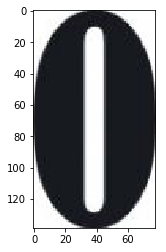

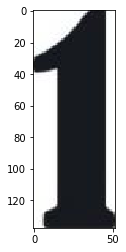

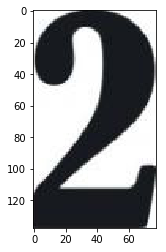

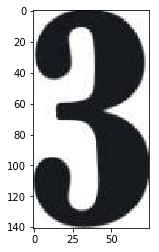

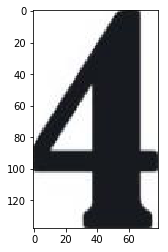

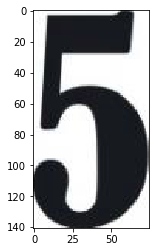

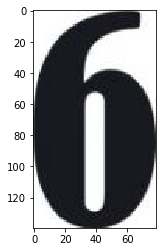

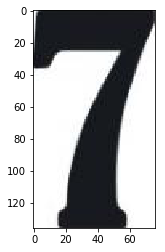

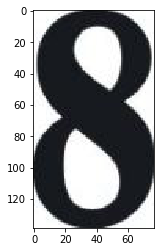

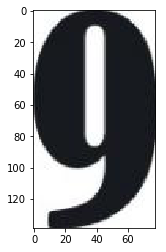

In [102]:
for arr in [sorted_upper, sorted_lower]:
    for x, y, w, h in arr:
        sliced = image[y:y+h,x:x+w]
        plt.imshow(sliced)
        plt.show()